## ANÁLISIS DATASETS FINALES

Tendremos 3 tablas finales

Carga y filtrado temporal del dataset.

Limpieza de columnas y tipos.

Limpieza del texto en tweet_text (con reglas claras).

Cálculo de la longitud del texto sin modificar el DataFrame.

Análisis temporal de los tweets únicos anotados.

Detección de idioma con visualización sobre muestra.

Exportación del dataset limpio.

In [22]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
csv_path = '/content/drive/MyDrive/TFM/notas_con_ratings_y_usuarios.csv'
final_df = pd.read_csv(csv_path)


# Mostrar las primeras filas para confirmar
final_df.head()

,tweet_id,tweet_text,views,replies,reposts,likes,bookmarks,noteId,noteAuthorParticipantId,createdAtMillis,...,enrollmentState,successfulRatingNeededToEarnIn,timestampOfLastStateChange,timestampOfLastEarnOut,modelingPopulation,modelingGroup,numberOfTimesEarnedOut,timestampMillisOfCurrentStatus,timestampMillisOfLatestNonNMRStatus,timestampMillisOfFirstNonNMRStatus
0,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,earnedIn,5.0,1.714648e+12,1.0,CORE,9.0,0.0,1.740718e+12,NaN,NaN
1,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,newUser,5.0,1.736560e+12,1.0,EXPANSION,4.0,0.0,1.740718e+12,NaN,NaN
2,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,earnedIn,5.0,1.730509e+12,1.0,CORE,9.0,0.0,1.740718e+12,NaN,NaN
3,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,newUser,5.0,1.739411e+12,1.0,CORE,9.0,0.0,1.740718e+12,NaN,NaN
4,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,earnedIn,5.0,1.711872e+12,1.0,EXPANSION,4.0,0.0,1.740718e+12,NaN,NaN


In [24]:
final_df.shape

(867027, 61)

In [25]:
final_df.columns

Index(['tweet_id', 'tweet_text', 'views', 'replies', 'reposts', 'likes',
       'bookmarks', 'noteId', 'noteAuthorParticipantId', 'createdAtMillis',
       'classification', 'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'currentStatus', 'firstNonNMRStatus',
       'mostRecentNonNMRStatus', 'lockedStatus', 'noteId.1',
       'raterParticipantId', 'ratingCreatedAtMillis', 'agree', 'disagree',
       'helpfulnessLevel', 'helpfulOther', 'helpfulClear',
       'helpfulGoodSources', 'helpfulAddressesClaim', 'notHelpfulOther',
       'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnrelia

## Limpieza

### DATASET FINAL: "final_df"

In [26]:
#Eliminamos las columnas innecesarias: noteId.1 (duplicada), timestampOfLastStateChange, timestampOfLastEarnOut, modelingPopulation, modelingGroup, numberOfTimesEarnedOut
final_df.drop(columns=['noteId.1','participantId', 'modelingPopulation', 'modelingGroup', 'numberOfTimesEarnedOut'], inplace=True)

Corrección de tipo de variables:

In [27]:
final_df.isna().sum()

,0
tweet_id,0
tweet_text,0
views,250871
replies,226237
reposts,222923
likes,222919
bookmarks,222414
noteId,0
noteAuthorParticipantId,0
createdAtMillis,0


In [28]:
duplicados_filas = final_df.duplicated().sum()
print(f"Filas duplicadas completas: {duplicados_filas}")

Filas duplicadas completas: 0


Eliminamos nulos de las variables de estudio:

In [29]:
final_df = final_df[~(final_df['helpfulnessLevel'].isna() | final_df['currentStatus'].isna())]

#Se excluyen del análisis aquellas notas sin nivel de utilidad (helpfulnessLevel) o sin estado final (currentStatus) definido, para garantizar la calidad de los datos y la estabilidad del objetivo de predicción.”

In [30]:
final_df.tweet_id.nunique()

4532

In [31]:
final_df.isna().sum()

,0
tweet_id,0
tweet_text,0
views,250582
replies,226033
reposts,222729
likes,222729
bookmarks,222224
noteId,0
noteAuthorParticipantId,0
createdAtMillis,0


Durante el proceso de limpieza del dataset, se eliminaron todas las filas en las que al menos uno de los campos helpfulnessLevel o CurrentStatus era nulo. Estos registros no aportaban valor al análisis, ya que faltaba información esencial para evaluar tanto la utilidad percibida como el estado actual de las notas.

## Añadir ratings

In [32]:
final_df.currentStatus

,currentStatus
0,NEEDS_MORE_RATINGS
1,NEEDS_MORE_RATINGS
2,NEEDS_MORE_RATINGS
3,NEEDS_MORE_RATINGS
4,NEEDS_MORE_RATINGS
...,...
867022,NEEDS_MORE_RATINGS
867023,NEEDS_MORE_RATINGS
867024,NEEDS_MORE_RATINGS
867025,NEEDS_MORE_RATINGS


In [33]:
# 1️⃣ contar ratings totales por noteId
ratings_count_per_note = final_df.groupby("noteId").size().reset_index(name="num_ratings")

# 2️⃣ contar ratings por helpfulnessLevel (puede que falten categorías)
helpfulness_counts = (
    final_df.groupby(["noteId", "helpfulnessLevel"])
    .size()
    .unstack(fill_value=0)
)

# revisamos qué columnas salieron realmente
print("Columnas presentes tras unstack:", helpfulness_counts.columns)

# forzamos columnas con .get()
helpfulness_counts['HELPFUL'] = helpfulness_counts.get('HELPFUL', 0)
helpfulness_counts['SOMEWHAT_HELPFUL'] = helpfulness_counts.get('SOMEWHAT_HELPFUL', 0)
helpfulness_counts['NOT_HELPFUL'] = helpfulness_counts.get('NOT_HELPFUL', 0)

# renombrar
helpfulness_counts = helpfulness_counts.rename(columns={
    'HELPFUL': 'num_ratings_HELPFUL',
    'SOMEWHAT_HELPFUL': 'num_ratings_SOMEWHAT_HELPFUL',
    'NOT_HELPFUL': 'num_ratings_NOT_HELPFUL'
}).reset_index()

# 3️⃣ combinar todo
ratings_summary = ratings_count_per_note.merge(
    helpfulness_counts,
    on="noteId",
    how="left"
)

# 4️⃣ merge al final_df
final_df = final_df.merge(ratings_summary, on="noteId", how="left")

# verificación rápida
print(final_df[['noteId',
                'num_ratings',
                'num_ratings_HELPFUL',
                'num_ratings_SOMEWHAT_HELPFUL',
                'num_ratings_NOT_HELPFUL']].head())


Columnas presentes tras unstack: Index(['HELPFUL', 'NOT_HELPFUL', 'SOMEWHAT_HELPFUL'], dtype='object', name='helpfulnessLevel')
                noteId  num_ratings  num_ratings_HELPFUL  \
0  1890259955376353504           68                   68   
1  1890259955376353504           68                   68   
2  1890259955376353504           68                   68   
3  1890259955376353504           68                   68   
4  1890259955376353504           68                   68   

   num_ratings_SOMEWHAT_HELPFUL  num_ratings_NOT_HELPFUL  
0                             0                        0  
1                             0                        0  
2                             0                        0  
3                             0                        0  
4                             0                        0  


In [34]:
# filtrar a notas únicas
notas_unicas = final_df.drop_duplicates(subset="noteId")

# ver las columnas que nos interesan
display(
    notas_unicas[[
        'noteId',
        'num_ratings',
        'num_ratings_HELPFUL',
        'num_ratings_SOMEWHAT_HELPFUL',
        'num_ratings_NOT_HELPFUL',
        'currentStatus'
    ]]
    .sort_values("num_ratings", ascending=False)
    .head(20)  # las 20 con más ratings
)

,noteId,num_ratings,num_ratings_HELPFUL,num_ratings_SOMEWHAT_HELPFUL,num_ratings_NOT_HELPFUL,currentStatus
349108,1679013318357286912,2947,2433,55,459,CURRENTLY_RATED_HELPFUL
372170,1783205851077173529,2554,550,40,1964,NEEDS_MORE_RATINGS
358613,1783198833234587719,2507,620,22,1865,NEEDS_MORE_RATINGS
170094,1742830986511978500,2394,2322,18,54,CURRENTLY_RATED_HELPFUL
381168,1783193249085284445,2291,483,38,1770,NEEDS_MORE_RATINGS
364250,1783195232764371168,2155,508,29,1618,NEEDS_MORE_RATINGS
374724,1783205146169618593,2055,347,22,1686,NEEDS_MORE_RATINGS
479019,1769164177505915258,2049,1771,29,249,NEEDS_MORE_RATINGS
165033,1862655447053877455,1582,1538,5,39,CURRENTLY_RATED_HELPFUL
688185,1861176416630386841,1580,1032,14,534,NEEDS_MORE_RATINGS


#LIMPIEZA TEXTO


Limpieza inicial: borramos el nombre del autor del tweet y todo lo que va seguido de "Translate Post", pues ya habremos creado las columnas

## TWEET

In [35]:
import re
import pandas as pd

def clean_tweet_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # 1. Cortar en "Translate post" si aparece
    if "translate post" in text.lower():
        text = text.split("Translate post")[0]

    # 2. Separar por líneas y eliminar vacías
    lines = [line.strip() for line in text.split('\n') if line.strip() != ""]

    # 2b. Eliminar directamente las dos primeras líneas si existen
    lines = lines[2:]  # esto elimina línea 0 y 1

    # 3. Filtrar líneas irrelevantes
    filtered_lines = []
    for line in lines:
        line_lower = line.lower()
        if any(kw in line_lower for kw in [
            "subscribe", "this post", "quote", "retweet", "learn more", "suspended account"
        ]):
            continue
        if re.match(r"^\d{1,2}:\d{2} (AM|PM)", line):  # líneas que empiezan con hora
            continue
        if "views" in line_lower and any(char.isdigit() for char in line):
            continue
        filtered_lines.append(line)

    # 4. Unir líneas
    body = " ".join(filtered_lines)

    # 5. Eliminar menciones tipo @usuario
    body = re.sub(r'@\w+', '', body)

    # 6. Eliminar URLs
    body = re.sub(r'http\S+|www\.\S+', '', body)


    # 7. Limpiar espacios extra
    body = re.sub(r'\s+', ' ', body).strip()
   # 8. Borrar fragmentos de métricas tipo "· 1.7M Views 647 1.8K 26K 663"
    body = re.sub(r"·\s*[\d\.]+[KM]?\s+Views.*$", "", body, flags=re.IGNORECASE)
        # 9. Bloques tipo From
    body = re.sub(r"From\s+.*$", "", body, flags=re.IGNORECASE)

    # 10. Bloques tipo fecha + texto + métricas
    body = re.sub(
        r"(?:·\s*)?\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2},\s+\d{4}.*?(?:\d+[KM]?\s+){2,}\d+[KM]?$",
        "",
        body,
        flags=re.IGNORECASE
    )


    return body

# Aplicar la limpieza
final_df['tweet_clean'] = final_df['tweet_text'].apply(clean_tweet_text)

In [36]:
#Consultas:
# Asegurar que tweetId es único
final_unique = final_df.drop_duplicates(subset='tweet_id')

# Mostrar tabla con tweetId, texto original y texto limpio
from IPython.display import display

display(
    final_unique[['tweet_id', 'tweet_text', 'tweet_clean']].head(100)
)

,tweet_id,tweet_text,tweet_clean
0,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,En Argentina la inflación ha vuelto a aumentar...
68,1865816080104714525,Fran orcajada\n@nimbus_soul\nElla no se llamab...,"Ella no se llamaba Alicia pero juntos, por las..."
74,1812882257243525459,Tarquino Paspala\n@TarquinoPaspala\nCucutazo P...,Cucutazo Piñera dejó Stgo y otras ciudades con...
80,1751405389071921488,ERROR,
103,1753801622994456746,Patricia Bullrich\n@PatoBullrich\nYa hay 18 de...,"Ya hay 18 detenidos, más los de Ciudad, por lo..."
...,...,...,...
12146,1837985830687695182,TI829™ (₿) \n@TI829\nMiren que tan feliz está...,"Miren que tan feliz está el pueblo, así despid..."
12152,1881392636189086179,Valor Billonario\n@ValorBIllonario\nSi crees q...,Si crees que la VIRGINID4D no importa LEE esto...
12213,1720652988522328548,Elecciones Datos\n@EleccionesDatos\nURGENTE\n\...,URGENTE La le dio Like a una publicación llama...
12234,1765342351168254461,El Peluca Milei\n@ElPelucaMilei\nSubscribe\nNo...,No hay un chico que no lo filme a Milei. El íd...


##NOTA

In [37]:
import pandas as pd
import re

# función mejorada para limpiar links, dominios y rutas
def limpiar_links(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # quitar http o www
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # quitar palabras con puntos tipo dominio (ej: indec.gob.ar)
    text = re.sub(r'\b[\w\.-]+\.\w{2,}\b', '', text)

    # quitar cualquier secuencia tras una barra (por ejemplo /ruta)
    text = re.sub(r'/\S+', '', text)

    # limpiar espacios
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# trabajar solo con notas únicas para limpiar bien
notas_unicas = final_df.drop_duplicates(subset='noteId').copy()

# aplicar limpieza
notas_unicas['note_clean'] = notas_unicas['summary'].fillna('').apply(limpiar_links)

# longitud de la nota limpia
notas_unicas['note_length'] = notas_unicas['note_clean'].apply(len)

# top 100
top_100_summaries = notas_unicas.sort_values('note_length', ascending=False).head(100)

# mostrar comparativa
from IPython.display import display
display(
    top_100_summaries[['noteId', 'summary', 'note_clean', 'note_length']]
)

# ahora incorporar de nuevo al final_df
final_df = final_df.merge(
    notas_unicas[['noteId', 'note_clean', 'note_length']],
    how='left',
    on='noteId'
)

# verificación
print(final_df[['noteId', 'note_clean', 'note_length']].head())


,noteId,summary,note_clean,note_length
855968,1735814082299625862,Javier Milei no anunció &quot;represión total ...,Javier Milei no anunció &quot;represión total ...,312
312934,1823157589917479207,El usuario Sí ha usado a menores con fines de ...,El usuario Sí ha usado a menores con fines de ...,308
804906,1894112280897335334,Los juzgados tanto de España como de Italia ha...,Los juzgados tanto de España como de Italia ha...,307
287549,1856719632545001792,NNN. El tuit de Mister Jagger hace referencia ...,NNN. El tuit de Mister Jagger hace referencia ...,307
199054,1810790017934987467,La frase &quot;La France est tissu de migratio...,La frase &quot;La France est tissu de migratio...,307
...,...,...,...,...
758545,1890225858323071390,"Ya van 4 notas y todas irrelevantes, y que agr...","Ya van 4 notas y todas irrelevantes, y que agr...",286
271819,1787452802974789966,Traducción real del titular: &quot;Un negocio ...,Traducción real del titular: &quot;Un negocio ...,286
833877,1722777807560859653,El video expresa exactamente lo que Javier Mil...,El video expresa exactamente lo que Javier Mil...,286
56703,1853714856127439302,Tuit hecho en base a una frase falsa y tergive...,Tuit hecho en base a una frase falsa y tergive...,286


                noteId                                         note_clean  \
0  1890259955376353504  La inflación sigue bajando y está en su valor ...   
1  1890259955376353504  La inflación sigue bajando y está en su valor ...   
2  1890259955376353504  La inflación sigue bajando y está en su valor ...   
3  1890259955376353504  La inflación sigue bajando y está en su valor ...   
4  1890259955376353504  La inflación sigue bajando y está en su valor ...   

   note_length  
0           73  
1           73  
2           73  
3           73  
4           73  


In [38]:

final_df.columns

Index(['tweet_id', 'tweet_text', 'views', 'replies', 'reposts', 'likes',
       'bookmarks', 'noteId', 'noteAuthorParticipantId', 'createdAtMillis',
       'classification', 'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary',
       'isMediaNote', 'currentStatus', 'firstNonNMRStatus',
       'mostRecentNonNMRStatus', 'lockedStatus', 'raterParticipantId',
       'ratingCreatedAtMillis', 'agree', 'disagree', 'helpfulnessLevel',
       'helpfulOther', 'helpfulClear', 'helpfulGoodSources',
       'helpfulAddressesClaim', 'notHelpfulOther', 'notHelpfulIncorrect',
       'notHelpfulSourcesMissingOrUnreliable', 'notHe

# Longitud tweet y nota

📊 Resumen estadístico de la longitud de los tweets:
count    866526.000000
mean        189.448292
std         361.689867
min           0.000000
25%           0.000000
50%         113.000000
75%         244.000000
max        9725.000000
Name: tweet_length, dtype: float64

Moda (valor más frecuente): 0


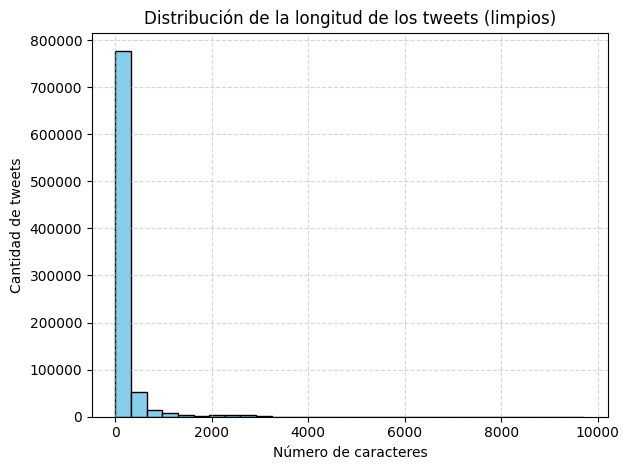

In [39]:
import matplotlib.pyplot as plt



# Crear nueva columna con la longitud del tweet limpio
final_df['tweet_length'] = final_df['tweet_clean'].dropna().apply(len)

# Estadísticos descriptivos
descripcion_tweet = final_df['tweet_length'].describe()
moda_tweet = final_df['tweet_length'].mode()[0]

print("📊 Resumen estadístico de la longitud de los tweets:")
print(descripcion_tweet)
print(f"\nModa (valor más frecuente): {moda_tweet}")

# Visualización
plt.hist(final_df['tweet_length'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la longitud de los tweets (limpios)')
plt.xlabel('Número de caracteres')
plt.ylabel('Cantidad de tweets')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [40]:
# Para los tweets
max_tweet_length = final_df['tweet_length'].max()
min_tweet_length = final_df['tweet_length'].min()

print(f"✅ Longitud máxima de tweet limpio: {max_tweet_length} caracteres")
print(f"✅ Longitud mínima de tweet limpio: {min_tweet_length} caracteres")

# Para las notas
max_note_length = final_df['note_length'].max()
min_note_length = final_df['note_length'].min()

print(f"✅ Longitud máxima de nota: {max_note_length} caracteres")
print(f"✅ Longitud mínima de nota: {min_note_length} caracteres")


✅ Longitud máxima de tweet limpio: 9725 caracteres
✅ Longitud mínima de tweet limpio: 0 caracteres
✅ Longitud máxima de nota: 312 caracteres
✅ Longitud mínima de nota: 0 caracteres


In [41]:
# Filtrar quitando las notas con note_length igual a 0
final_df = final_df[final_df['note_length'] > 0].copy()

print(f"✅ Registros finales tras eliminar notas vacías: {final_df.shape}")

✅ Registros finales tras eliminar notas vacías: (866469, 64)


## idioma tweet

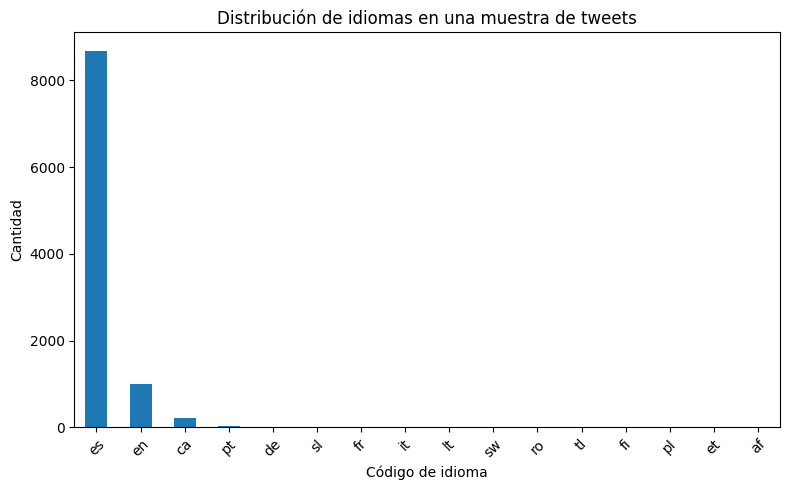

In [42]:
!pip install langdetect

from langdetect import detect, LangDetectException
import matplotlib.pyplot as plt

# Muestreo opcional para acelerar (ej. 10.000 tweets)
sample = final_df['tweet_text'].dropna().sample(n=10000, random_state=42)

# Función para detectar idioma
def detectar_idioma(texto):
    try:
        return detect(texto)
    except LangDetectException:
        return "error"

# Detectar idioma en el sample
idiomas = sample.apply(detectar_idioma)

# Contar frecuencias
idioma_counts = idiomas.value_counts().sort_values(ascending=False)

# Graficar
plt.figure(figsize=(8, 5))
idioma_counts.plot(kind='bar')
plt.title("Distribución de idiomas en una muestra de tweets")
plt.xlabel("Código de idioma")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# 1️⃣ Obtener tweets únicos
tweets_unicos = final_df[['tweet_id', 'tweet_text']].drop_duplicates(subset='tweet_id').copy()

print(f"Total de tweets únicos: {tweets_unicos.shape[0]}")

# 2️⃣ Detectar idioma para cada tweet único
tweets_unicos['tweet_language'] = tweets_unicos['tweet_text'].fillna('').apply(detectar_idioma)

# 3️⃣ Revisar distribución de idiomas
print(tweets_unicos['tweet_language'].value_counts())

# 4️⃣ Incorporar la variable de idioma al dataframe completo
#    con un merge por tweet_id
final_df = final_df.merge(
    tweets_unicos[['tweet_id', 'tweet_language']],
    on='tweet_id',
    how='left'
)

# 5️⃣ Comprobamos
print(final_df['tweet_language'].value_counts())


Total de tweets únicos: 4532
tweet_language
es    3830
en     572
ca      67
pt      17
de       8
it       6
fr       4
sl       4
ro       3
nl       3
tl       2
af       2
et       2
lt       2
fi       2
id       2
sw       2
hr       1
ko       1
pl       1
lv       1
Name: count, dtype: int64
tweet_language
es    745418
en    102596
ca      8377
pt      2973
tl      1207
it      1203
de       956
ro       920
lt       868
sl       497
id       330
fr       286
et       258
fi       255
nl       122
af        66
lv        52
sw        48
pl        21
hr         8
ko         8
Name: count, dtype: int64


In [44]:
# sirve para visualizar texto invalido = ["ERROR", "Subscribe", "This Post is unavailable. Learn more", ...
final_df[final_df['tweet_clean'].str.len() < 60]['tweet_clean'].unique()



array(['', '"Donde hay una necesidad, nace un aumento"',
       'Así debería ser en todas partes del mundo',
       'Dónde están los más de 100.000 nuevos empleos públicos?',
       'No hay un chico que no lo filme a Milei. El ídolo de todos',
       'Que empiece el terror. ',
       '#AHORA | Inusual sismo en Buenos Aires, Argentina. ',
       'Hoy se come choripán en honor a él',
       'Ahí va che, estos no rinden examen de IDONEIDAD',
       'cumanacoa , #HurricaneBeryl ',
       'Aprende a preparar la mantequilla más saludable del mundo',
       'Me corté el flequillito ',
       'Pero después te dicen que "no hay plata"',
       'No tenemos alcalde. Quito en EMERGENCIA. \u2066 \u2069 \u2066 \u2069 \u2066 \u2069',
       'La Historia de la IIGM contada por los terraplanistas ',
       'BOLUDO que le pasó a iñaki???',
       'Señor, rece porque su Dios amnistíe esto y cállese.',
       'No Academy can match LaMasia ',
       'how tf yall see a dildo dis clearly an iced out vape ',


# Exportación

In [45]:
final_df

,tweet_id,tweet_text,views,replies,reposts,likes,bookmarks,noteId,noteAuthorParticipantId,createdAtMillis,...,timestampMillisOfFirstNonNMRStatus,num_ratings,num_ratings_HELPFUL,num_ratings_NOT_HELPFUL,num_ratings_SOMEWHAT_HELPFUL,tweet_clean,note_clean,note_length,tweet_length,tweet_language
0,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
1,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
2,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
3,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
4,1881764276169535754,Eduardo Garzón\n@edugaresp\nEn Argentina la in...,241700.0,264.0,23.0,28.0,13.0,1890259955376353504,C1E44FDF383308595A9BBD1A45572ACEACFB44730F8D6A...,1739508067350,...,NaN,68,68,0,0,En Argentina la inflación ha vuelto a aumentar...,La inflación sigue bajando y está en su valor ...,73,156,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866464,1725350463434813665,Diego Brancatelli\n@diegobranca\nLa inflación ...,2100000.0,8700.0,2600.0,4700.0,83.0,1725483191090213108,2C58290C0582098962097CB7AD94B7F2D103B61D2B0154...,1700222225339,...,NaN,141,83,48,10,La inflación puede bajar. Se corrige y chau. D...,el post tiene afirmaciones absolutamente falsas,47,278,es
866465,1725350463434813665,Diego Brancatelli\n@diegobranca\nLa inflación ...,2100000.0,8700.0,2600.0,4700.0,83.0,1725483191090213108,2C58290C0582098962097CB7AD94B7F2D103B61D2B0154...,1700222225339,...,NaN,141,83,48,10,La inflación puede bajar. Se corrige y chau. D...,el post tiene afirmaciones absolutamente falsas,47,278,es
866466,1725350463434813665,Diego Brancatelli\n@diegobranca\nLa inflación ...,2100000.0,8700.0,2600.0,4700.0,83.0,1725483191090213108,2C58290C0582098962097CB7AD94B7F2D103B61D2B0154...,1700222225339,...,NaN,141,83,48,10,La inflación puede bajar. Se corrige y chau. D...,el post tiene afirmaciones absolutamente falsas,47,278,es
866467,1725350463434813665,Diego Brancatelli\n@diegobranca\nLa inflación ...,2100000.0,8700.0,2600.0,4700.0,83.0,1725483191090213108,2C58290C0582098962097CB7AD94B7F2D103B61D2B0154...,1700222225339,...,NaN,141,83,48,10,La inflación puede bajar. Se corrige y chau. D...,el post tiene afirmaciones absolutamente falsas,47,278,es


In [46]:
# Ruta de exportación
csv_export_path = '/content/drive/MyDrive/TFM/community_notes_final_data.csv'

# Exportar
final_df.to_csv(csv_export_path, index=False)

print(f"✅ Archivo exportado correctamente en: {csv_export_path}")


✅ Archivo exportado correctamente en: /content/drive/MyDrive/TFM/community_notes_final_data.csv


# Subdatasets con notas y tuits únicos

In [47]:
final_df.shape

(866469, 65)

In [48]:
# 1. Eliminar duplicados por tweet_id, manteniendo la primera aparición
sub_df_unico = final_df.drop_duplicates(subset='tweet_id').copy()

# 2. Resumen rápido
print(sub_df_unico.shape)
print(sub_df_unico.columns.tolist())

# 3. Guardar en CSV
csv_export_path = '/content/drive/MyDrive/TFM/tuits_unicos.csv'
sub_df_unico.to_csv(csv_export_path, index=False)
print(f"✅ Archivo exportado correctamente en: {csv_export_path}")

(4532, 65)
['tweet_id', 'tweet_text', 'views', 'replies', 'reposts', 'likes', 'bookmarks', 'noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'classification', 'misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia', 'misleadingOutdatedInformation', 'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact', 'misleadingSatire', 'notMisleadingOther', 'notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources', 'summary', 'isMediaNote', 'currentStatus', 'firstNonNMRStatus', 'mostRecentNonNMRStatus', 'lockedStatus', 'raterParticipantId', 'ratingCreatedAtMillis', 'agree', 'disagree', 'helpfulnessLevel', 'helpfulOther', 'helpfulClear', 'helpfulGoodSources', 'helpfulAddressesClaim', 'notHelpfulOther', 'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable', 'notHelpfulMissingKeyPoints', 'notHelpfulHardToUnderstand', 'notHelpfulArgumentativeOrBiased', 'not

In [49]:
# 1. Eliminar duplicados por tweet_id + noteId, manteniendo la primera aparición
sub_df_notas_unicas = final_df.drop_duplicates(subset=['tweet_id', 'noteId']).copy()

# 2. Resumen rápido
print(sub_df_notas_unicas.shape)
print(sub_df_notas_unicas.columns.tolist())

# 3. Guardar en CSV
csv_export_path = '/content/drive/MyDrive/TFM/tuits_notas_unicas.csv'
sub_df_notas_unicas.to_csv(csv_export_path, index=False)
print(f"✅ Archivo exportado correctamente en: {csv_export_path}")

(10237, 65)
['tweet_id', 'tweet_text', 'views', 'replies', 'reposts', 'likes', 'bookmarks', 'noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'classification', 'misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia', 'misleadingOutdatedInformation', 'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact', 'misleadingSatire', 'notMisleadingOther', 'notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources', 'summary', 'isMediaNote', 'currentStatus', 'firstNonNMRStatus', 'mostRecentNonNMRStatus', 'lockedStatus', 'raterParticipantId', 'ratingCreatedAtMillis', 'agree', 'disagree', 'helpfulnessLevel', 'helpfulOther', 'helpfulClear', 'helpfulGoodSources', 'helpfulAddressesClaim', 'notHelpfulOther', 'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable', 'notHelpfulMissingKeyPoints', 'notHelpfulHardToUnderstand', 'notHelpfulArgumentativeOrBiased', 'no

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866469 entries, 0 to 866468
Data columns (total 65 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   tweet_id                                866469 non-null  int64  
 1   tweet_text                              866469 non-null  object 
 2   views                                   615913 non-null  float64
 3   replies                                 640462 non-null  float64
 4   reposts                                 643766 non-null  float64
 5   likes                                   643766 non-null  float64
 6   bookmarks                               644271 non-null  float64
 7   noteId                                  866469 non-null  int64  
 8   noteAuthorParticipantId                 866469 non-null  object 
 9   createdAtMillis                         866469 non-null  int64  
 10  classification                          8664